# Part II - FordGoBike Trips... Who shares their trip?
## by Aishat Adeyemo 


## Investigation Overview

In this exploratory analysis, I want to look at the attributes of users/trips that could be used to predict whether a trip would be shared or not. The focus of interests are user type, gender, age, and period of trip.

## Dataset Overview

This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. It contains trips and attributes for approximately 183,500 trips taken in the month of February, year 2019. The attributes include user's biodata, user type (subscriber/non-subscriber), trip duration, trip start and end time, and start/end locations.


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
trip = pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
#create a list of columns with null values
null_columns = ['member_birth_year', 'member_gender']

#loop through the list
for i in null_columns:
    
    #fill nulls with most occurring values
    trip[i].fillna(trip[i].mode()[0], inplace = True)
    
trip.dropna(inplace = True)

In [4]:
#change datatypes to appropriate ones
convert_dtype = {'start_time' : 'datetime64'
                 , 'end_time' : 'datetime64'
                 , 'start_station_id' : str
                 , 'start_station_latitude' : str
                 , 'start_station_longitude' : str
                 , 'end_station_id' : str
                 , 'end_station_latitude' : str
                 , 'end_station_longitude' : str
                 , 'bike_id' : str
                 , 'member_birth_year' : int
                }
trip = trip.astype(convert_dtype)

In [5]:
#convert duration_sec to duration_min
trip['duration_min'] = (trip['duration_sec'] / 60).astype(int) 

#create a new age column and as int datatype
trip['age'] = (pd.datetime.now().year - trip['member_birth_year']).astype(int)

#extract the ride hour from start tim
hour = trip['start_time'].dt.hour

#categorize the hours into periods
trip['ride_period'] = pd.cut(hour, bins = [-1, 6, 11, 13, 16, 19, 23],
                        labels = ['Midnight', 'Morning', 'Mid-day', 'Afternoon', 'Evening', 'Night'])

#extract the weekday from start time
trip['day'] = trip['start_time'].dt.day_name()

In [6]:
#create an ordered categorical type for day, user_type, member_gender and ride_period
var_order = {'day' : ['Sunday', 'Monday', 'Tuesday', 'Wednesday',
                       'Thursday', 'Friday', 'Saturday'],
             'member_gender' : ['Male', 'Female', 'Other'],
             'user_type' : ['Subscriber', 'Customer'],
             'ride_period' : ['Midnight', 'Morning', 'Mid-day', 'Afternoon', 'Evening', 'Night']}

for var in var_order:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = var_order[var])
    trip[var] = trip[var].astype(ordered_var) 

## Percentage of Shared Trips and Unshared Trips

Only 9% of the trips taken in the month February were shared. i.e, 1 out of 11 trips were shared.  


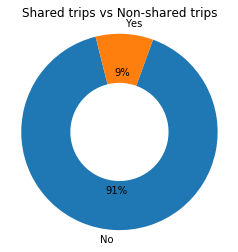

In [7]:
#get the count for each unique values in the column
values = trip.bike_share_for_all_trip.value_counts()

#plot a bar graph of trip share status
plt.pie(values, labels = values.index, startangle = 70,
        counterclock = False, autopct='%1.0f%%', wedgeprops = {'width' : 0.5})
plt.axis('square')
plt.title('Shared trips vs Non-shared trips');

## Distribution of Users' Ages

Users of the bike hailing services are as young as 21 years and as old as 144 years. The highest users are about 36 years old.

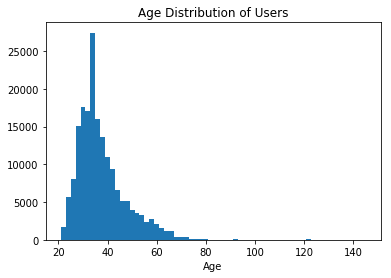

In [8]:
#set a limit on x-axis and reduce the bin size
bins = np.arange(trip['age'].min(), trip['age'].max()+2, 2)

plt.hist(data = trip, x = 'age', bins = bins)
#plt.xlim([20,100])
plt.xlabel('Age')
plt.title('Age Distribution of Users');

## Distribution of Trip Duration in minutes

Trips taken by users were as short as 1 minutes and some lasted for as long as 1400 minutes. When plotted on a log scale, it is observed that most of the trips taken were 4-5 minutes long.

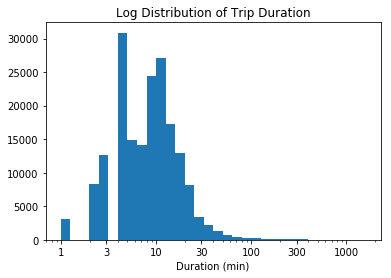

In [9]:
#plot a log-scale distribution
bins = 10 ** np.arange(0, np.log10(trip['duration_min'].max())+0.1, 0.1)

plt.hist(data = trip, x = 'duration_min', bins = bins)
plt.xscale('log')
plt.xticks([1, 3, 10, 30, 100, 300, 1000], [1, 3, 10, 30, 100, 300, 1000])
plt.xlabel('Duration (min)')
plt.title('Log Distribution of Trip Duration');

## When are the peak periods?
The peak periods are Morning and Evening. This periods corresponds with when most people leave thier homes for the day's business and when they return to their homes at the close of the day respectively.


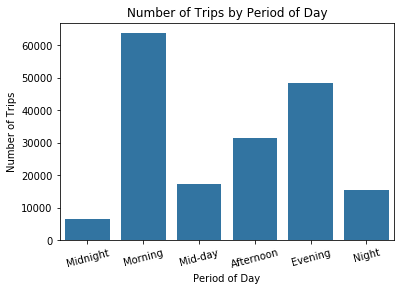

In [10]:
color = sb.color_palette()[0]
sb.countplot(data = trip, x = 'ride_period', color = color)
plt.xticks(rotation = 15)
plt.xlabel('Period of Day')
plt.ylabel('Number of Trips')
plt.title('Number of Trips by Period of Day');

## Which Gender took the most trips?
The Male gender took the most trips in the month of February, followed by the Female gender. The Other gender were the least users of the bike share service.


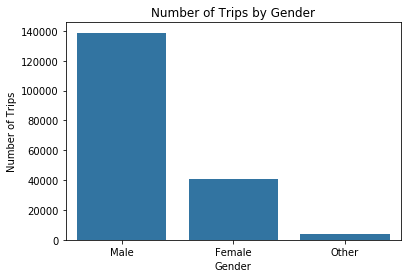

In [11]:
color = sb.color_palette()[0]
sb.countplot(data = trip, x = 'member_gender', color = color)
plt.xlabel('Gender')
plt.ylabel('Number of Trips')
plt.title('Number of Trips by Gender');

## What category of users shared their trips?
Only subscribers of the bike services shared their trips. From the gender point of view, the male gender shared their trips more than the female and the other gender. The order of shared trips by user category is as follows;
>Male subscriber > Female subscriber > Other subscriber 


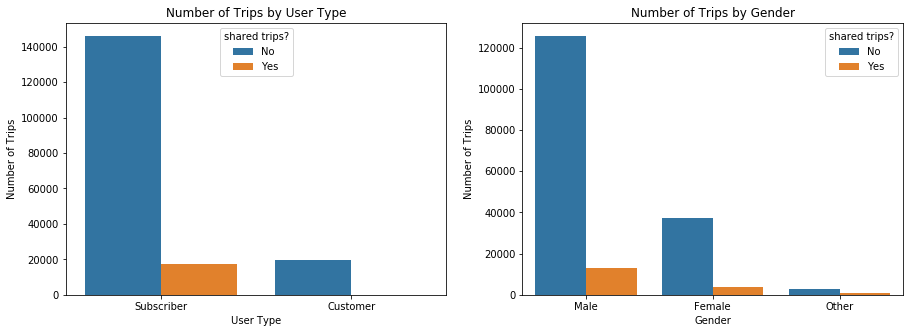

In [12]:
plt.figure(figsize = [15, 5])

plt.subplot(1, 2, 1)
sb.countplot(data = trip, x = 'user_type',
             hue = 'bike_share_for_all_trip')
plt.ylabel('Number of Trips')
plt.xlabel('User Type')
plt.title('Number of Trips by User Type')
plt.legend(title= 'shared trips?');

plt.subplot(1, 2, 2)
sb.countplot(data = trip, x = 'member_gender',
             hue = 'bike_share_for_all_trip')
plt.ylabel('Number of Trips')
plt.xlabel('Gender')
plt.title('Number of Trips by Gender')
plt.legend(title= 'shared trips?');

## What age group do the people who share their trips belong and what's the duration of their trips?
The users who shared their trips have an average age that ranges from 35-40. They were most males that were less than 36 years old. Their trips lasted for an average of 10-15 minutes and they were mostly under 11 minutes also taken by the Male gender.

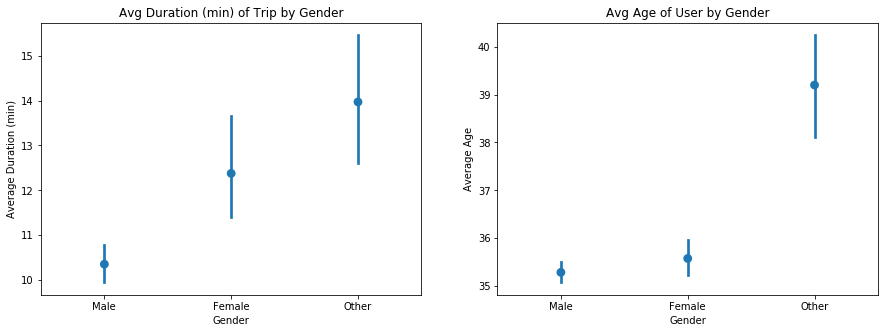

In [13]:
#create a subset of the data
trip_sub_yes = trip[(trip['user_type'] == 'Subscriber') & (trip['bike_share_for_all_trip'] == 'Yes')]

plt.figure(figsize = [15, 5])

plt.subplot(1, 2, 1)
sb.pointplot(data = trip_sub_yes, x = 'member_gender', y = 'duration_min',
            linestyles = '', dodge = 0.2)
plt.xlabel('Gender')
plt.ylabel('Average Duration (min)')
plt.title('Avg Duration (min) of Trip by Gender')

plt.subplot(1, 2, 2)
sb.pointplot(data = trip_sub_yes, x = 'member_gender', y = 'age',
            linestyles = '', dodge = 0.2)
plt.xlabel('Gender')
plt.ylabel('Average Age')
plt.title('Avg Age of User by Gender');


### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [14]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 390955 bytes to Part_II_slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck_template.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 778: /usr/bin/